# Numpy -  多维数据数组软件库

NumPy是Python中科学计算的基本软件包。它是一个Python库，提供多维数组对象、各种派生类(如掩码数组和矩阵)和各种例程。
* 用于对数组进行快速操作，包括数学、逻辑、形状操作、排序、选择、I/O、离散傅立叶变换、基本线性代数、基本统计操作、随机模拟等等。
* Numpy作为Python数据计算的基础广泛应用到数据处理、信号处理、机器学习等领域。

![cover image](images/numpy.png)

## 1. 简介

`numpy`包(模块)用在几乎所有使用Python的数值计算中，为Python提供高性能向量，矩阵和高维数据结构的模块。它是用C和Fortran语言实现的，因此当计算向量化数据（用向量和矩阵表示）时，性能非常的好。

为了使用`numpy`模块，你先要像下面的例子一样导入这个模块：

In [1]:
# 这一行的作用会在Matplotlib中介绍
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# 不建议用这种方式导入库
from numpy import *

In [3]:
# 建议使用这种方式
import numpy as np

**建议大家使用第二种导入方法** `import numpy as np`


## 2. 创建`numpy`数组

有很多种方法去初始化新的numpy数组, 例如从

* Python列表或元组
* 使用专门用来创建numpy arrays的函数，例如 `arange`, `linspace`等
* 从文件中读取数据

### 2.1 从列表中

例如，为了从Python列表创建新的向量和矩阵我们可以用`numpy.array`函数。


In [4]:
import numpy as np

a = [1, 2, 3, 4]
print(a)

# a vector: the argument to the array function is a Python list
v = np.array(a)

v

[1, 2, 3, 4]


array([1, 2, 3, 4])

In [7]:
# 矩阵:数组函数的参数是一个嵌套的Python列表
a = [[1, 2], [3, 4], [5, 6]]
M = np.array(a)

print(a)
print(M)
print()
print(M.shape)

[[1, 2], [3, 4], [5, 6]]
[[1 2]
 [3 4]
 [5 6]]

(3, 2)


In [9]:
M = np.array([[[1,2], [3,4], [5,6]], \
              [[3,4], [5,6], [7,8]], \
              [[5,6], [7,8], [9,10]], \
              [[7,8], [9,10], [11,12]]])
print(M)
print()
print(M.shape)

[[[ 1  2]
  [ 3  4]
  [ 5  6]]

 [[ 3  4]
  [ 5  6]
  [ 7  8]]

 [[ 5  6]
  [ 7  8]
  [ 9 10]]

 [[ 7  8]
  [ 9 10]
  [11 12]]]

(4, 3, 2)


`v`和`M`两个都是属于`numpy`模块提供的`ndarray`类型。

In [10]:
type(v), type(M)

(numpy.ndarray, numpy.ndarray)

`v`和`M`之间的区别仅在于他们的形状。我们可以用属性函数`ndarray.shape`得到数组形状的信息。

In [11]:
v.shape

(4,)

In [12]:
M.shape

(4, 3, 2)

通过属性函数`ndarray.size`我们可以得到数组中元素的个数

In [13]:
M.size

24

同样，我们可以用函数`numpy.shape`和`numpy.size`

In [15]:
np.shape(M)

(4, 3, 2)

In [16]:
np.size(M)

24

到目前为止`numpy.ndarray`看起来非常像Python列表(或嵌套列表)。为什么不简单地使用Python列表来进行计算，而不是创建一个新的数组类型?

下面有几个原因：

* Python列表非常普遍。它们可以包含任何类型的对象。它们是动态类型的。它们不支持矩阵和点乘等数学函数。由于动态类型的关系，为Python列表实现这类函数的效率不是很高。
* Numpy数组是**静态类型的**和**同构的**。元素的类型是在创建数组时确定的。
* Numpy数组是内存高效的。
* 由于是静态类型，数学函数的快速实现，比如“numpy”数组的乘法和加法可以用编译语言实现(使用C和Fortran).

利用`ndarray`的属性函数`dtype`（数据类型），我们可以看出数组的数据是那种类型。


In [17]:
M.dtype

dtype('int64')

如果我们试图给一个numpy数组中的元素赋一个错误类型的值，我们会得到一个错误:

In [23]:
M[0,0,0] = "Hello"


如果想显式设定类型的话，可以利用`dtype`关键字参数显式地创建给定数据类型的数组：

In [25]:
M = np.array([[1, 2], [3, 4]], dtype=complex)

M

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

常规可以伴随`dtype`使用的数据类型是：`int`, `float`, `complex`, `bool`, `object`等

也可以显式地定义数据类型的大小，例如：`int64`, `int16`, `float128`, `complex128`。

### 2.2 使用数组生成函数

对于较大的数组，使用显式的Python列表人为地初始化数据是不切实际的。除此之外可以用`numpy`的很多函数得到不同类型的数组。有一些常用的分别是：

#### arange

In [27]:
# 创建一个范围

x = np.arange(0, 10, 1) # 参数：start, stop, step: 
y = range(0, 10, 1)
print(x)
print(list(y))

[0 1 2 3 4 5 6 7 8 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [29]:
x = np.arange(-1.5, 1.5, 0.1)

x

array([-1.50000000e+00, -1.40000000e+00, -1.30000000e+00, -1.20000000e+00,
       -1.10000000e+00, -1.00000000e+00, -9.00000000e-01, -8.00000000e-01,
       -7.00000000e-01, -6.00000000e-01, -5.00000000e-01, -4.00000000e-01,
       -3.00000000e-01, -2.00000000e-01, -1.00000000e-01,  1.33226763e-15,
        1.00000000e-01,  2.00000000e-01,  3.00000000e-01,  4.00000000e-01,
        5.00000000e-01,  6.00000000e-01,  7.00000000e-01,  8.00000000e-01,
        9.00000000e-01,  1.00000000e+00,  1.10000000e+00,  1.20000000e+00,
        1.30000000e+00,  1.40000000e+00])

#### linspace and logspace

In [30]:
# 使用linspace两边的端点也被包含进去
np.linspace(0, 10, 5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

In [19]:
np.logspace(0, 10, 10, base=np.e)

array([1.00000000e+00, 3.03773178e+00, 9.22781435e+00, 2.80316249e+01,
       8.51525577e+01, 2.58670631e+02, 7.85771994e+02, 2.38696456e+03,
       7.25095809e+03, 2.20264658e+04])

#### mgrid

In [31]:
y, x = np.mgrid[0:5, 0:5] # 和MATLAB中的meshgrid类似

In [32]:
x

array([[0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4],
       [0, 1, 2, 3, 4]])

In [33]:
y

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4]])

#### random 数据

In [34]:
from numpy import random

In [35]:
# 均匀随机数在[0,1)区间
random.rand(5,4,2)

array([[[0.70579787, 0.45339106],
        [0.70077228, 0.42219419],
        [0.23131123, 0.03411284],
        [0.2532498 , 0.07772567]],

       [[0.75365153, 0.69937927],
        [0.21553641, 0.56617441],
        [0.61761472, 0.11883064],
        [0.7861052 , 0.25673121]],

       [[0.71446123, 0.85646903],
        [0.28415481, 0.62853095],
        [0.33432352, 0.16008364],
        [0.44492951, 0.37964323]],

       [[0.29149357, 0.6174702 ],
        [0.74610846, 0.29358931],
        [0.54484636, 0.6733187 ],
        [0.26218121, 0.49989907]],

       [[0.19261666, 0.73021809],
        [0.96694702, 0.91832708],
        [0.25561228, 0.26086337],
        [0.63901316, 0.18787211]]])

In [25]:
# 标准正态分布随机数
random.randn(4,4)

array([[-1.74300737,  1.94689131,  0.18922227, -0.20440928],
       [ 1.31664152, -0.01176745, -0.43956951,  0.53571291],
       [ 0.02140654, -0.09635041, -1.84205831,  0.64951045],
       [ 0.35682903,  0.96657395, -0.50099255, -0.80044681]])

#### diag

In [36]:
# 一个对角矩阵
np.diag([1,2,3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

In [38]:
# 从主对角线偏移的对角线
np.diag([1,2,3], k=1) 

array([[0, 1, 0, 0],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

#### zeros and ones

In [39]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 3. 文件 I/O

### 3.1 逗号分隔值 (CSV)

对于数据文件来说一种非常常见的文件格式是逗号分割值（CSV），或者有关的格式例如TSV（制表符分隔的值）。为了从这些文件中读取数据到Numpy数组中，我们可以用`numpy.genfromtxt`函数。例如：

In [43]:
!head stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1
1800  1  4   -19.3   -19.3   -19.3 1
1800  1  5   -16.8   -16.8   -16.8 1
1800  1  6   -11.4   -11.4   -11.4 1
1800  1  7    -7.6    -7.6    -7.6 1
1800  1  8    -7.1    -7.1    -7.1 1
1800  1  9   -10.1   -10.1   -10.1 1
1800  1 10    -9.5    -9.5    -9.5 1


In [44]:
import numpy as np

data = np.genfromtxt('stockholm_td_adj.dat')

In [45]:
data.shape

(77431, 7)

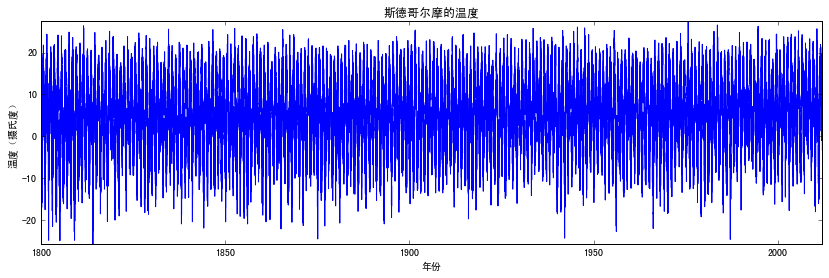

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False   # 步骤二（解决坐标轴负数的负号显示问题）

fig, ax = plt.subplots(figsize=(14,4))
ax.plot(data[:,0]+data[:,1]/12.0+data[:,2]/365, data[:,5])
ax.axis('tight')
ax.set_title('斯德哥尔摩的温度')
ax.set_xlabel('年份')
ax.set_ylabel('温度（摄氏度）');
fig.savefig('fig-res-tempture-stockholm.pdf')

使用`numpy.savetxt`我们可以将一个Numpy数组以CSV格式存入:

In [47]:
M = np.random.rand(3,3)

M

array([[0.82845074, 0.51029894, 0.08941169],
       [0.61403488, 0.90697888, 0.54387303],
       [0.87268988, 0.78110361, 0.53332052]])

In [35]:
np.savetxt("random-matrix.csv", M)

In [36]:
!cat random-matrix.csv

3.474310879390657414e-01 3.466609365910759966e-01 6.779623624489031775e-01
3.777553531256817587e-01 7.452935047749419395e-01 4.463927097637667707e-01
7.097023968559375007e-01 5.472163711854115542e-01 9.640087120207403437e-01


In [37]:
np.savetxt("random-matrix.csv", M, fmt='%.5f') # fmt 确定格式

!cat random-matrix.csv

0.34743 0.34666 0.67796
0.37776 0.74529 0.44639
0.70970 0.54722 0.96401


### 3.2 numpy 的本地文件格式

当存储和读取numpy数组时非常有用。利用函数`numpy.save`和`numpy.load`：

In [48]:
np.save("random-matrix.npy", M)

!file random-matrix.npy

random-matrix.npy: NumPy array, version 1.0, header length 118


In [49]:
np.load("random-matrix.npy")

array([[0.82845074, 0.51029894, 0.08941169],
       [0.61403488, 0.90697888, 0.54387303],
       [0.87268988, 0.78110361, 0.53332052]])

## 4. 更多Numpy数组的性质

In [50]:
M = np.array([[1, 2], [3, 4], [5, 6]])

print(M.dtype)
print(M.itemsize) # 每个元素的字节数


int64
8


In [51]:
M.nbytes # 字节数

48

In [52]:
M.ndim # 维度

2

## 5. 操作数组

### 5.1 索引

我们可以用方括号和下标索引元素：

In [53]:
v = np.array([1, 2, 3, 4, 5])

# v 是一个向量，仅仅只有一维，取一个索引
v[0]

1

In [54]:
# M 是一个矩阵或者是一个二维的数组，取两个索引 
print(M[1,1])
print(M[1][1])
print(M[1])

4
4
[3 4]


如果我们省略了一个多维数组的索引，它将会返回整行（或者，总的来说，一个 N-1 维的数组）

In [45]:
M

array([[1, 2],
       [3, 4],
       [5, 6]])

In [55]:
M[1]

array([3, 4])

相同的事情可以利用 `:` 而不是索引来实现：

In [56]:
M[1,:] # 行 1

array([3, 4])

In [57]:
M[:,1] # 列 1

array([2, 4, 6])

我们可以用索引赋新的值给数组中的元素:

In [58]:
M[0,0] = 1

In [59]:
M

array([[1, 2],
       [3, 4],
       [5, 6]])

In [60]:
# 对行和列也同样有用
M[1,:] = 0
M[:,1] = -1

In [52]:
M

array([[ 1, -1],
       [ 0, -1],
       [ 5, -1]])

### 5.2 切片索引

切片索引是语法 `M[lower:upper:step]` 的技术名称，用于提取数组的一部分：

In [61]:
A = np.array([1,2,3,4,5])
A

array([1, 2, 3, 4, 5])

In [62]:
A[1:3]

array([2, 3])

切片索引到的数据是 *可变的* : 如果它们被分配了一个新值，那么从其中提取切片的原始数组将被修改：

In [63]:
A[1:3] = [-2,-3] # auto convert type
A[1:3] = np.array([-2, -3])  

A

array([ 1, -2, -3,  4,  5])

可以省略 `M[lower:upper:step]` 中任意的三个值

In [56]:
A[::] # lower, upper, step 都取默认值

array([ 1, -2, -3,  4,  5])

In [57]:
A[:]

array([ 1, -2, -3,  4,  5])

In [58]:
A[::2] # step is 2, lower and upper 代表数组的开始和结束

array([ 1, -3,  5])

In [59]:
A[:3] # 前3个元素

array([ 1, -2, -3])

In [60]:
A[3:] # 从索引3开始的元素

array([4, 5])

负索引计数从数组的结束(正索引从开始):

In [61]:
A = np.array([1,2,3,4,5])

In [62]:
A[-1] # 数组中最后一个元素

5

In [63]:
A[-3:] # 最后三个元素

array([3, 4, 5])

索引切片的工作方式与多维数组完全相同:

In [64]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

A

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24],
       [30, 31, 32, 33, 34],
       [40, 41, 42, 43, 44]])

In [65]:
# 原始数组中的一个块
A[1:4, 1:4]

array([[11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [66]:
# 步长
A[::2, ::2]

array([[ 0,  2,  4],
       [20, 22, 24],
       [40, 42, 44]])

### 5.3 花式索引

Fancy索引是一个名称时，一个数组或列表被使用在一个索引:

In [67]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

row_indices = [1, 3, 2]
print(A[row_indices])
print(A)

[[10 11 12 13 14]
 [30 31 32 33 34]
 [20 21 22 23 24]]
[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


In [69]:
col_indices = [1, 1, -1] # 索引-1 代表最后一个元素
A[row_indices, col_indices]

array([11, 31, 24])

我们也可以使用索引掩码:如果索引掩码是一个数据类型`bool`的Numpy数组，那么一个元素被选择(True)或不(False)取决于索引掩码在每个元素位置的值:

In [71]:
B = np.array([n for n in range(5)])
B

array([0, 1, 2, 3, 4])

In [73]:
row_mask = np.array([True, False, True, False, False])
B[row_mask]

array([0, 2])

In [74]:
# 相同的事情
row_mask = np.array([1,0,1,0,0], dtype=bool)
B[row_mask]

array([0, 2])

这个特性对于有条件地从数组中选择元素非常有用，例如使用比较运算符:

In [75]:
x = np.arange(0, 10, 0.5)
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [76]:
mask = (5 < x) * (x < 7.5)

mask

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False])

In [77]:
x[mask]

array([5.5, 6. , 6.5, 7. ])

In [78]:
x[(3<x) * (x<6)]

array([3.5, 4. , 4.5, 5. , 5.5])

## 6. 用于从数组中提取数据和创建数组的函数

### 6.1 where

索引掩码可以使用`where`函数转换为位置索引

In [80]:
x = np.arange(0, 10, 0.5)
mask = (5 < x) * (x < 7.5)

indices = np.where(mask)

indices

(array([11, 12, 13, 14]),)

In [81]:
x[indices] # 这个索引等同于花式索引x[mask]

array([5.5, 6. , 6.5, 7. ])

### 6.2 diag

使用diag函数，我们还可以提取一个数组的对角线和亚对角线:

In [84]:
print(A)
np.diag(A)

[[ 0  1  2  3  4]
 [10 11 12 13 14]
 [20 21 22 23 24]
 [30 31 32 33 34]
 [40 41 42 43 44]]


array([ 0, 11, 22, 33, 44])

In [83]:
np.diag(A, -1)

array([10, 21, 32, 43])

## 7. 线性代数

向量化代码是使用Python/Numpy编写高效数值计算的关键。这意味着尽可能多的程序应该用矩阵和向量运算来表示，比如矩阵-矩阵乘法。

### 7.1 Scalar-array 操作

我们可以使用常用的算术运算符来对标量数组进行乘、加、减和除运算。

In [85]:
import numpy as np

v1 = np.arange(0, 5)

In [86]:
v1 * 2

array([0, 2, 4, 6, 8])

In [87]:
v1 + 2

array([2, 3, 4, 5, 6])

In [88]:
A = np.array([[n+m*10 for n in range(5)] for m in range(5)])

print(A * 2)

print(A + 2)

[[ 0  2  4  6  8]
 [20 22 24 26 28]
 [40 42 44 46 48]
 [60 62 64 66 68]
 [80 82 84 86 88]]
[[ 2  3  4  5  6]
 [12 13 14 15 16]
 [22 23 24 25 26]
 [32 33 34 35 36]
 [42 43 44 45 46]]


### 7.2 数组间的元素操作

当我们对数组进行加法、减法、乘法和除法时，默认的行为是**element-wise**操作：

In [89]:
A = np.random.rand(2, 3)

A * A # element-wise 乘法

array([[0.04644473, 0.04194416, 0.47883722],
       [0.54588546, 0.01731503, 0.6762046 ]])

In [90]:
v1 = np.array([1.0, 2.0])
v1 * v1

array([1., 4.])

如果我们用兼容的形状进行数组的乘法，我们会得到每一行的对位相乘结果：

In [95]:
A.shape, v1.shape
print(A)
print(v1)

[[0.2155104  0.20480274 0.69198065]
 [0.73884062 0.1315866  0.82231661]]
[1. 2.]


In [99]:
A*v1

ValueError: operands could not be broadcast together with shapes (2,3) (2,) 

In [98]:
A.T * v1

array([[0.2155104 , 1.47768123],
       [0.20480274, 0.2631732 ],
       [0.69198065, 1.64463321]])

### 7.4 矩阵代数

矩阵的乘法有两种方法，第一种方法是点乘函数，它对两个参数应用矩阵-矩阵、矩阵-向量或内向量乘法

In [101]:
A = np.random.rand(5, 5)
v1 = np.random.rand(5, 1)

np.dot(A, A)

array([[1.12309   , 2.2085345 , 1.7819952 , 1.65833535, 1.28453148],
       [0.33434263, 2.28904424, 1.42540142, 1.66026458, 1.29312083],
       [0.33457282, 1.44496209, 1.7598308 , 1.29000407, 0.62386269],
       [0.25751315, 1.78002052, 1.39686586, 1.5606918 , 0.83024555],
       [0.36376464, 1.73034161, 1.06421057, 1.11477265, 1.15680181]])

In [102]:
np.dot(A, v1)


array([[1.98507978],
       [1.24839224],
       [0.93544866],
       [0.71593381],
       [1.29545275]])

In [103]:
np.dot(v1.T, v1)

array([[2.25685841]])

另外，我们可以将数组对象投到`matrix`类型上。这将改变标准算术运算符`+, -, *` 的行为，以使用矩阵代数。

In [105]:
M = np.matrix(A)
v = np.matrix(v1).T # make it a column vector

In [106]:
v

matrix([[0.93788751, 0.13927003, 0.978233  , 0.04281574, 0.63170904]])

In [107]:
M * M

matrix([[1.12309   , 2.2085345 , 1.7819952 , 1.65833535, 1.28453148],
        [0.33434263, 2.28904424, 1.42540142, 1.66026458, 1.29312083],
        [0.33457282, 1.44496209, 1.7598308 , 1.29000407, 0.62386269],
        [0.25751315, 1.78002052, 1.39686586, 1.5606918 , 0.83024555],
        [0.36376464, 1.73034161, 1.06421057, 1.11477265, 1.15680181]])

In [108]:
M * v.T

matrix([[1.98507978],
        [1.24839224],
        [0.93544866],
        [0.71593381],
        [1.29545275]])

In [109]:
# 內积
v * v.T

matrix([[2.25685841]])

如果我们尝试用不相配的矩阵形状加，减或者乘我们会得到错误：

In [113]:
v = np.matrix([1,2,3,4,5]).T

In [114]:
np.shape(M), np.shape(v)

((5, 5), (5, 1))

In [115]:
M * v

matrix([[7.92376781],
        [9.47121037],
        [6.98226306],
        [7.1825789 ],
        [6.67757715]])

### 7.5 矩阵计算与数据处理

#### 求逆

In [116]:
C = np.array([[1, 2], [3, 4]])
np.linalg.inv(C) # equivalent to C.I 

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

#### 行列式

In [117]:
np.linalg.det(C)

-2.0000000000000004

#### 数据统计
通常将数据集存储在Numpy数组中是非常有用的。Numpy提供了许多函数用于计算数组中数据集的统计。

例如，让我们从上面使用的斯德哥尔摩温度数据集计算一些属性。

In [118]:
import numpy as np
data = np.genfromtxt('stockholm_td_adj.dat')

# 提醒一下，温度数据集存储在数据变量中:
np.shape(data)

(77431, 7)

#### mean

In [120]:
# 温度数据在第三列中
print(data.shape)
np.mean(data[:,3])

(77431, 7)


6.197109684751585

In [121]:
A = np.random.rand(4, 3)
np.mean(A)

0.6298323446656802

在过去的200年里，斯德哥尔摩每天的平均气温大约是6.2 C。

#### 标准差和方差

In [123]:
np.std(data[:,3]), np.var(data[:,3])

(8.282271621340573, 68.59602320966341)

#### 最小值和最大值

In [124]:
# 最低日平均温度
data[:,3].min()

-25.8

In [125]:
# 最高日平均温度
data[:,3].max()

28.3

#### sum, prod, and trace

In [126]:
d = np.arange(0, 10)
d

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [127]:
# 将所有的元素相加
np.sum(d)

45

In [128]:
# 全元素积分
np.prod(d+1)

3628800

In [129]:
# 累计求和
np.cumsum(d)

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36, 45])

In [130]:
# 累计乘积
np.cumprod(d+1)

array([      1,       2,       6,      24,     120,     720,    5040,
         40320,  362880, 3628800])

In [131]:
# 计算对角线元素的和，和diag(A).sum()一样
np.trace(A)

2.3246646567243014

### 7.6 数组子集的计算

我们可以使用索引、花式索引和从数组中提取数据的其他方法(如上所述)来计算数组中的数据子集。

例如，让我们回到温度数据集:

In [132]:
!head -n 3 stockholm_td_adj.dat

1800  1  1    -6.1    -6.1    -6.1 1
1800  1  2   -15.4   -15.4   -15.4 1
1800  1  3   -15.0   -15.0   -15.0 1


数据集的格式是：年，月，日，日平均气温，低，高，位置。

如果我们对某个特定月份的平均温度感兴趣，比如二月，然后我们可以创建一个索引掩码，使用它来选择当月的数据:

In [133]:
np.unique(data[:,1]) # 列的值从1到12

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [134]:
mask_feb = data[:,1] == 2
print(mask_feb)

[False False False ... False False False]


In [135]:
# 温度数据实在第三行
print(np.mean(data[mask_feb,3]))
print(np.std(data[mask_feb,3]))

-3.212109570736596
5.090390768766271


有了这些工具，我们就有了非常强大的数据处理能力。例如，提取每年每个月的平均气温只需要几行代码:

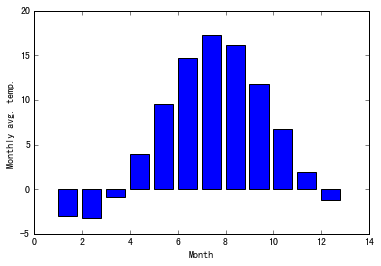

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt

months = np.unique(data[:,1])
monthly_mean = [np.mean(data[data[:,1] == month, 3]) for month in months]

fig, ax = plt.subplots()
ax.bar(months, monthly_mean)
ax.set_xlabel("Month")
ax.set_ylabel("Monthly avg. temp.");

### 7.7 高维数据的计算

当例如`min`, `max`等函数应用在高维数组上时，有时将计算应用于整个数组是有用的，而且很多时候有时只基于行或列。用`axis`参数我们可以决定这个函数应该怎样表现：

In [137]:
import numpy as np

m = np.random.rand(4,3)
m

array([[0.65430115, 0.12431018, 0.49599019],
       [0.59918196, 0.72089552, 0.34269067],
       [0.74769538, 0.69686536, 0.35621994],
       [0.61852787, 0.70536225, 0.06504484]])

In [138]:
# global max
m.max()

0.7476953810023619

In [139]:
# max in each column
m.max(axis=0)

array([0.74769538, 0.72089552, 0.49599019])

In [140]:
# max in each row
m.max(axis=1)

array([0.65430115, 0.72089552, 0.74769538, 0.70536225])

许多其他的在`array` 和`matrix`类中的函数和方法接受同样（可选的）的关键字参数`axis`

## 8. 阵列的重塑、调整大小和堆叠

Numpy数组的形状可以被确定而无需复制底层数据，这使得即使对于大型数组也能有较快的操作。

In [141]:
import numpy as np

A = np.random.rand(4, 3)
print(A)

[[0.78519728 0.15775634 0.03890868]
 [0.48267243 0.05821189 0.96613776]
 [0.76181876 0.79747884 0.85199696]
 [0.61926823 0.27633702 0.76651623]]


In [142]:
n, m = A.shape
print(n, m)

4 3


In [144]:
B = A.reshape((1,n*m))
B

array([[0.78519728, 0.15775634, 0.03890868, 0.48267243, 0.05821189,
        0.96613776, 0.76181876, 0.79747884, 0.85199696, 0.61926823,
        0.27633702, 0.76651623]])

In [145]:
B2 = A.reshape((n*m, 1))
print(B2)
print(B2.shape)

[[0.78519728]
 [0.15775634]
 [0.03890868]
 [0.48267243]
 [0.05821189]
 [0.96613776]
 [0.76181876]
 [0.79747884]
 [0.85199696]
 [0.61926823]
 [0.27633702]
 [0.76651623]]
(12, 1)


In [146]:
B[0,0:5] = 5 # modify the array

B

array([[5.        , 5.        , 5.        , 5.        , 5.        ,
        0.96613776, 0.76181876, 0.79747884, 0.85199696, 0.61926823,
        0.27633702, 0.76651623]])

In [147]:
A # and the original variable is also changed. B is only a different view of the same data

array([[5.        , 5.        , 5.        ],
       [5.        , 5.        , 0.96613776],
       [0.76181876, 0.79747884, 0.85199696],
       [0.61926823, 0.27633702, 0.76651623]])

We can also use the function `flatten` to make a higher-dimensional array into a vector. But this function create a copy of the data.

In [148]:
B = A.flatten()

B

array([5.        , 5.        , 5.        , 5.        , 5.        ,
       0.96613776, 0.76181876, 0.79747884, 0.85199696, 0.61926823,
       0.27633702, 0.76651623])

In [149]:
print(B.shape)

(12,)


In [150]:
T = np.random.rand(3, 4, 5)
T2 = T.flatten()
print(T2)

[0.51110357 0.36543148 0.36939715 0.14022005 0.6268352  0.00636831
 0.82890719 0.51145062 0.16072218 0.99073929 0.96970778 0.85973022
 0.27339743 0.93029089 0.08330827 0.95720719 0.14573418 0.77709524
 0.97026939 0.51474888 0.82234327 0.46406383 0.05258201 0.90861813
 0.06359622 0.22060077 0.44463362 0.88191886 0.32267272 0.5203602
 0.39421885 0.73865461 0.75810546 0.94533578 0.70099854 0.35188207
 0.73767664 0.8464147  0.78947462 0.49024445 0.17088021 0.9221971
 0.26637317 0.42399527 0.67094074 0.38923384 0.7553479  0.24364291
 0.47827327 0.60831433 0.01124522 0.59944347 0.46013596 0.18677825
 0.87114672 0.21210642 0.2111575  0.01062604 0.41290141 0.29851044]


In [151]:
B[0:5] = 10

B

array([10.        , 10.        , 10.        , 10.        , 10.        ,
        0.96613776,  0.76181876,  0.79747884,  0.85199696,  0.61926823,
        0.27633702,  0.76651623])

In [152]:
A # 现在A并没有改变，因为B的数值是A的复制，并不指向同样的值。

array([[5.        , 5.        , 5.        ],
       [5.        , 5.        , 0.96613776],
       [0.76181876, 0.79747884, 0.85199696],
       [0.61926823, 0.27633702, 0.76651623]])

## 9. 添加、删除维度：newaxis、squeeze

当矩阵乘法的时候，需要两个矩阵的对应的纬度保持一致才可以正确执行，有了`newaxis`，我们可以在数组中插入新的维度，例如将一个向量转换为列或行矩阵：

In [153]:
v = np.array([1,2,3])

In [154]:
print(np.shape(v))
print(v)

(3,)
[1 2 3]


In [155]:
v2 = v.reshape(3, 1)
print(v2.shape)
print(v2)

(3, 1)
[[1]
 [2]
 [3]]


In [156]:
# 做一个向量v的列矩阵
v2 = v[:, np.newaxis]
print(v.shape)
print(v2.shape)
print(v2)


(3,)
(3, 1)
[[1]
 [2]
 [3]]


In [157]:
# 列矩阵
v[:,np.newaxis].shape

(3, 1)

In [158]:
# 行矩阵
v[np.newaxis,:].shape

(1, 3)

也可以通过 `np.expand_dims` 来实现类似的操作

In [159]:
v = np.array([1,2,3])
v3 = np.expand_dims(v, 1)
print(v3.shape)
print(v3)

(3, 1)
[[1]
 [2]
 [3]]


在某些情况，需要将纬度为1的那个纬度删除掉，可以使用`np.squeeze`实现

In [161]:
arr = np.array([[[1, 2, 3], [2, 3, 4]]])
print(arr.shape)
print(arr)

(1, 2, 3)
[[[1 2 3]
  [2 3 4]]]


In [162]:
# 实际上第一个纬度为`1`，我们不需要
arr2 = np.squeeze(arr, 0)
print(arr2.shape)
print(arr2)

(2, 3)
[[1 2 3]
 [2 3 4]]


需要注意：只有数组长度在该纬度上为1，那么该纬度才可以被删除；否则会报错。

## 10. 叠加和重复数组

利用函数`repeat`, `tile`, `vstack`, `hstack`, 和`concatenate` 可以用较小的向量和矩阵来创建更大的向量和矩阵。

### 10.1 tile and repeat

In [163]:
a = np.array([[1, 2], [3, 4]])
print(a)

[[1 2]
 [3 4]]


In [164]:
# 重复每一个元素三次
np.repeat(a, 3)

array([1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4])

In [165]:
# tile the matrix 3 times 
np.tile(a, 3)

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [166]:
# 更好的方案
np.tile(a, (1, 3))

array([[1, 2, 1, 2, 1, 2],
       [3, 4, 3, 4, 3, 4]])

In [148]:
np.tile(a, (3, 1))

array([[1, 2],
       [3, 4],
       [1, 2],
       [3, 4],
       [1, 2],
       [3, 4]])

### 10.2 concatenate

In [167]:
b = np.array([[5, 6]])

In [168]:
np.concatenate((a, b), axis=0)

array([[1, 2],
       [3, 4],
       [5, 6]])

In [169]:
np.concatenate((a, b.T), axis=1)

array([[1, 2, 5],
       [3, 4, 6]])

### 10.3 hstack and vstack

In [170]:
np.vstack((a,b))

array([[1, 2],
       [3, 4],
       [5, 6]])

In [171]:
np.hstack((a,b.T))

array([[1, 2, 5],
       [3, 4, 6]])

## 11. 复制和“深度复制”

为了获得高性能，Python中的赋值通常不复制底层对象。例如，在函数之间传递对象时，通过引用传递从而避免不必要的大量内存复制。

In [172]:
A = np.array([[1, 2], [3, 4]])

A

array([[1, 2],
       [3, 4]])

In [173]:
# 现在B和A指的是同一个数组数据
B = A 

In [174]:
# 改变B影响A
B[0,0] = 10

B

array([[10,  2],
       [ 3,  4]])

In [175]:
A

array([[10,  2],
       [ 3,  4]])

如果我们想避免这种引用赋值的行为，那么当我们从 `A` 复制一个新的完全独立的对象 `B` 时，我们需要使用函数 `copy` 来做一个所谓的“深度复制”:

In [176]:
B = np.copy(A)

In [177]:
# 现在如果我们改变B，A不受影响
B[0,0] = -5

B

array([[-5,  2],
       [ 3,  4]])

In [178]:
A

array([[10,  2],
       [ 3,  4]])

## 12. 遍历数组元素

通常，我们希望尽可能避免遍历数组元素(不惜一切代价)。原因是在像Python(或MATLAB)这样的解释语言中，迭代与向量化操作相比真的很慢。

然而，有时迭代是不可避免的。对于这种情况，Python的For循环是最方便的遍历数组的方法:

In [179]:
v = np.array([1,2,3,4])

for element in v:
    print(element)

1
2
3
4


In [180]:
M = np.array([[1,2], [3,4]])

for row in M:
    print("row", row)
    
    for element in row:
        print(element)

row [1 2]
1
2
row [3 4]
3
4


当我们需要去
当我们需要遍历一个数组的每个元素并修改它的元素时，使用`enumerate`函数可以方便地在`for`循环中获得元素及其索引:

In [181]:
for row_idx, row in enumerate(M):
    print("row_idx", row_idx, "row", row)
    
    for col_idx, element in enumerate(row):
        print("col_idx", col_idx, "element", element)
       
        # 更新矩阵：对每个元素求平方
        M[row_idx, col_idx] = element ** 2

row_idx 0 row [1 2]
col_idx 0 element 1
col_idx 1 element 2
row_idx 1 row [3 4]
col_idx 0 element 3
col_idx 1 element 4


In [164]:
# 现在矩阵里的每一个元素都已经求得平方
M

array([[ 1,  4],
       [ 9, 16]])

## 13. 向量化功能

正如前面多次提到的，为了获得良好的性能，我们应该尽量避免对向量和矩阵中的元素进行循环，而应该使用向量化算法。将标量算法转换为向量化算法的第一步是确保我们编写的函数使用向量输入。

In [182]:
def Theta(x):
    """
    阶跃函数的普遍版本
    """
    if x >= 0:
        return 1
    else:
        return 0

In [183]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

这个操作并不可行，因为所实现的 `Theta` 函数不能接收向量输入。

为了得到向量化的版本，我们可以使用Numpy函数 `vectorize` 。在许多情况下，它可以自动向量化一个函数:

In [184]:
Theta_vec = np.vectorize(Theta)

In [185]:
Theta_vec(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

我们也可以实现从一开始就接受矢量输入的函数(需要更多的计算，但可能会有更好的性能):

In [187]:
def Theta(x):
    """
       Heaviside阶跃函数的矢量感知实现。
    """
    return 1 * (x >= 0)

In [188]:
Theta(np.array([-3,-2,-1,0,1,2,3]))

array([0, 0, 0, 1, 1, 1, 1])

In [189]:
a = np.array([-3,-2,-1,0,1,2,3])
b = a>=0
print(b)
b*1

[False False False  True  True  True  True]


array([0, 0, 0, 1, 1, 1, 1])

In [190]:
# 同样适用于标量
Theta(-1.2), Theta(2.6)

(0, 1)

## 14. 在条件中使用数组

当在条件中使用数组时，例如`if`语句和其他布尔表达，一个需要用`any`或者`all`，这让数组任何或者所有元素都等于`True`。

In [191]:
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

In [192]:
(M > 2).any()

True

In [193]:
if (M > 2).any():
    print("at least one element in M is larger than 2")
else:
    print("no element in M is larger than 2")

at least one element in M is larger than 2


In [194]:
if (M > 5).all():
    print("all elements in M are larger than 5")
else:
    print("all elements in M are not larger than 5")

all elements in M are not larger than 5


## 15. 类型转换

因为Numpy数组是*静态类型*，数组的类型一旦创建就不会改变。但是我们可以用`astype`函数（参见类似的“asarray”函数）显式地转换一个数组的类型到其他的类型，这总是创建一个新类型的新数组。

In [195]:
M.dtype


dtype('int64')

In [197]:
M2 = M.astype(float)

M2

array([[1., 2.],
       [3., 4.]])

In [198]:
M2.dtype

dtype('float64')

In [199]:
M3 = M.astype(bool)

M3

array([[ True,  True],
       [ True,  True]])

## 16. 进一步学习

* [NumPy 简易教程](https://www.runoob.com/numpy/numpy-tutorial.html)
* [NumPy 官方用户指南](https://www.numpy.org.cn/user/)
* [NumPy 官方参考手册](https://www.numpy.org.cn/reference/)
* [一个针对MATLAB使用者的Numpy教程](https://numpy.org/doc/stable/user/numpy-for-matlab-users.html)